In [3]:
from keras_segmentation.models.model_utils import transfer_weights
from keras_segmentation.models.unet import vgg_unet
from keras_segmentation.pretrained import pspnet_101_cityscapes, pspnet_50_ADE_20K
from keras_segmentation.models.pspnet import pspnet_101, pspnet_50
#from keras_segmentation.models.model_utils import transfer_weights
from tqdm import tqdm

pretrained_model = pspnet_50_ADE_20K()
new_model = pspnet_50(n_classes=3)

transfer_weights( pretrained_model , new_model  ) # transfer weights from pre-trained model to your model

new_model.train(
    train_images =  "dataset2/images_prepped_train/",
    train_annotations = "dataset2/annotations_prepped_train/",
    checkpoints_path = "pspnet_checkpoints/pspnet_50_three" , 
    epochs=100,
)

Verifying training dataset
Dataset verified! 
Starting Epoch  0
Epoch 1/1
205/512 [===========>..................] - ETA: 2:14 - loss: 0.4470 - acc: 0.8405   

100%|██████████| 18000/18000 [01:23<00:00, 215.41it/s]


KeyboardInterrupt: 

In [ ]:
model = vgg_unet( n_classes=2 ,  input_height=512, input_width=512  )

model.train(
    train_images =  "dataset2/images_prepped_train/",
    train_annotations = "dataset2/annotations_prepped_train/",
    checkpoints_path = "checkpoints/vgg_unet" , epochs=5
)

out = model.predict_segmentation(
    inp="carla.png",
    out_fname="/tmp/out.png"
)

import matplotlib.pyplot as plt
plt.imshow(out)

# evaluating the model
print(model.evaluate_segmentation( inp_images_dir="dataset2/images_prepped_test/"  , annotations_dir="dataset2/annotations_prepped_test/" ) )



In [ ]:
out = model.predict_segmentation(
    inp="../../training/images/-RvUfordKSu3eFmYIBbt_A.jpg",
    out_fname="/tmp/out.png"
)
plt.imshow(out)

In [ ]:
out = model.predict_segmentation(
    inp="carla.png",
    out_fname="eberg_out.png"
)
plt.imshow(out)

loaded weights  pspnet_checkpoints_best/pspnet_50.206


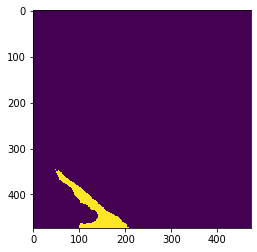

In [4]:
import matplotlib.pyplot as plt
from keras_segmentation.predict import model_from_checkpoint_path
checkpoint = model_from_checkpoint_path("pspnet_checkpoints_best/pspnet_50")
out = checkpoint.predict_segmentation(
    inp="carla.png",
    out_fname="carla_pspnet50.png"
)
plt.imshow(out)